(Regresjon)= 
### Regresjon
Når vi jobber med reelle datasett ønsker vi ofte å finne ut hvilken matematisk funksjon som passer best til dataene.

Når vi har funnet en matematisk funksjon er mulighetene mange. Vi kan lage en modell som ser hva som har skjedd *mellom*, *før* og *etter* datapunktene våre. Som en slags data-trollmann kan vi altså både spå fremtiden og se tilbake i tid 🧙‍♂️🔮
 
La oss starte med eksempelet om konsumprisindeks fra tidligere.

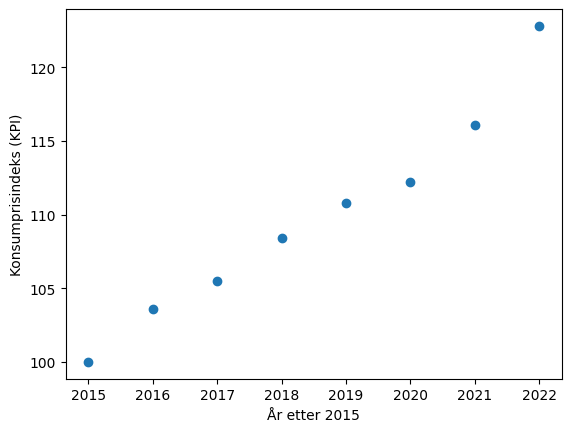

In [1]:
import matplotlib.pyplot as plt

x = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022] # År etter 2015
y = [100, 103.6, 105.5, 108.4, 110.8, 112.2, 116.1, 122.8] # Konsumprisindeks

plt.scatter(x, y)
plt.xlabel("År etter 2015")
plt.ylabel("Konsumprisindeks (KPI)")
plt.show()

Hvilken type matematisk funksjon tror du passer best her? En lineær funksjon? En andregradsfunksjon? Eller kanskje en eksponentiell funksjon?

> I denne delen skal vi bruke `curve_fit` funksjonen fra `scipy`-pakken. Det kan hende du må installere denne ved å kjøre `pip install scipy` i terminalvinduet.

#### Eksempel: Lineære funksjoner

Lineære funksjoner har funksjonsuttrykk på formen $f(x) = ax + b$. Ved å bruke `curve_fit` funksjonen kan vi finne hva *koeffisientene* $a$ og $b$ må være for at funksjonsuttrykket skal passe best mulig til datapunktene.

a: 2.911904761909067
b: -5767.7547619176175


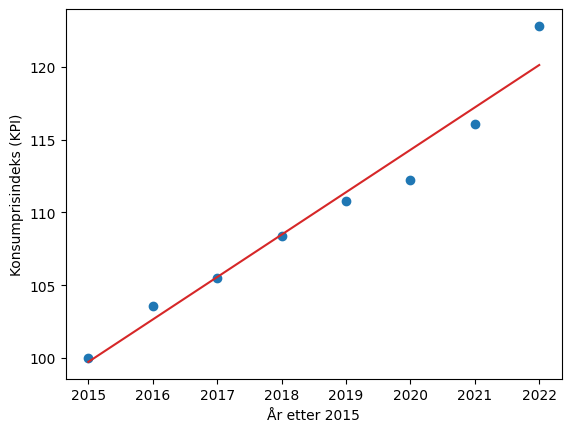

In [8]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Datapunkter (i arrays)
x = np.array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]) # År etter 2015
y = np.array([100, 103.6, 105.5, 108.4, 110.8, 112.2, 116.1, 122.8]) # Konsumprisindeks

# Definerer den matematiske funksjonen
def f(x, a, b):
    return a * x + b

# Finner koeffisienter
a, b = curve_fit(f, x, y)[0]

print("a:", a) # Skriver ut a-verdien
print("b:", b) # Skriver ut b-verdien

plt.scatter(x, y)
plt.plot(x, f(x, a, b), color = "tab:red") 
plt.xlabel("År etter 2015")
plt.ylabel("Konsumprisindeks (KPI)")
plt.show()

`curve_fit` funksjonen fant altså koeffisientene til å være $a\approx 2.91$ og $b\approx -5767.75$. Det vil si at funksjonsuttrykket for grafen kan skrives som $f(x)=2.91x - 5767.75$.

Siden koeffisienten $a\approx 3.41$ kan vi si at konsumprisindeksen i gjennomsnitt stiger med $2.91$ per år, ifølge modellen vår.

```{admonition} Noen kommentarer til koden
:class: note
- Vi må gjøre listene med data om til arrays med `np.array()` for å kunne bruke `curve_fit`-funksjonen på denne måten.
- `curve_fit`-funksjonen gir ut flere verdier i en liste, men vi er bare interessert i den første verdien i denne listen, som er en liste med koeffisientene. Derfor skriver vi `koeffisienter = curve_fit(f, x, y)[0]`
```

#### Sette inn verdier i modellen

La oss bruke modellen vår til å spå fremtiden eller se tilbake i tid.

- Hva sier modellen oss at konsumprisindeksen blir i 2030?
- Hva sier modellen vår at konsumprisindeksen var i 2005?

Når vi har brukt `curve_fit` for å finne koeffisientene `a` og `b` er det enkelt å finne konsumprisindeksen i et gitt år ved å skrive `f(år, a, b)`.

In [13]:
from scipy.optimize import curve_fit
import numpy as np

# Datapunkter (i arrays)
x = np.array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]) # År etter 2015
y = np.array([100, 103.6, 105.5, 108.4, 110.8, 112.2, 116.1, 122.8]) # Konsumprisindeks

# Definerer den matematiske funksjonen
def f(x, a, b):
    return a * x + b

# Finner koeffisienter
a, b = curve_fit(f, x, y)[0]

print("KPI i 2030 (modell):", f(2030, a, b))
print("KPI i 2005 (modell):", f(2005, a, b))

KPI i 2030 (modell): 143.41190475778876
KPI i 2005 (modell): 70.61428571006218


```{admonition} Hvordan passer modellen?
:class: note
Modellen sier altså at konsumprisindeksen i $2030$ kommer til å bli omtrent $143.41$.

Den sier også at konsumprisindeksen i $2005$ var omtrent $70.61$. Den var faktisk $82.3$.

Det kan være flere grunner for at modellen vår ikke passer godt med virkeligheten.

1. Vi har for få datapunkter.
2. Det siste datapunktet gikk opp mye mer enn alle de andre. Hva skjedde i 2022?
3. Å bruke en lineær funksjon var kanskje ikke riktig valg.
```

#### Andre matematiske funksjoner

La oss prøve å lage en modell med en andregradsfunksjon. Andregradsfunksjoner har funksjonsuttrykk på formen $f(x)=ax^2 + bx + c$.

Det eneste vi må endre i koden over er hvordan vi definerer den matematiske funksjonen og hvilke koeffisienter vi skal finne med `curve_fit`.

a: 0.1797608181738
b: -722.7825181950592
c: 726638.397852397


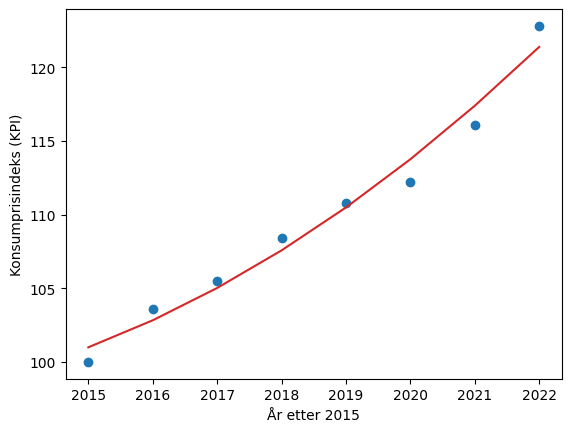

In [15]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Datapunkter (i arrays)
x = np.array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]) # År etter 2015
y = np.array([100, 103.6, 105.5, 108.4, 110.8, 112.2, 116.1, 122.8]) # Konsumprisindeks

# Definerer den matematiske funksjonen
def f(x, a, b, c):
    return a * x**2 + b * x + c

# Finner koeffisienter
a, b, c = curve_fit(f, x, y)[0]

print("a:", a) # Skriver ut a-verdien
print("b:", b) # Skriver ut b-verdien
print("c:", c) # Skriver ut c-verdien

plt.scatter(x, y)
plt.plot(x, f(x, a, b, c), color = "tab:red") 
plt.xlabel("År etter 2015")
plt.ylabel("Konsumprisindeks (KPI)")
plt.show()

`curve_fit` funksjonen fant altså koeffisientene til å være $a\approx 0.18$, $b\approx -722.78$ og $c\approx 726638.40$. Det vil si at funksjonsuttrykket for grafen kan skrives som $f(x)=0.18x^2 - 722.78x + 7266387.40$.

På samme måte kan vi også finne modeller med andre matematiske funksjonstyper som

- Tredjegradsfunksjoner $f(x)=ax^3+bx^2+cx+d$
- Eksponentialfunksjoner $f(x)=ab^x$
- Potensfunksjoner $f(x)=ax^b$
- Sinusfunksjoner $f(x)=A\cdot sin(kx + \phi) + d$

> Kilde til data om konsumprisindeks: [SSB](https://www.ssb.no/priser-og-prisindekser/konsumpriser/statistikk/konsumprisindeksen)

---

#### Oppgaver

##### Oppgave 1

Konsumprisindeksen for boligprisene for brukte boliger i Oslo og Bærum har utviklet seg på følgende måte.

```{list-table}
:header-rows: 1
* - 2015
  - 2016
  - 2017
  - 2018
  - 2019
  - 2020
  - 2021
  - 2022
* - $100.0$
  - $115.5$
  - $124.4$
  - $125.5$
  - $130.4$
  - $137.3$
  - $152.1$
  - $158.9$
```

a) Lag en linær modell for konsumprisindeksen. Hva blir konsumprisindeksen for brukte boliger i $2023$, ifølge modellen? Hva med i $2030$?

```{admonition} Finne endring i verdi fra KPI.
:class: hint

Man kan finne en tilnærming for hvor mye en bolig er verdt, gitt at den følger indeksen, ved å bruke formelen 

$$\text{verdi}_{\text{år}} = \frac{KPI_{\text{år}}}{KPI_{\text{tidligere år}}} \cdot \text{verdi}_{\text{tidligere år}}$$

For eksempel vil en bolig som er verdt $3\,000\,000$ kr i $2016$ stige i verdi til

$$\text{verdi}_{2020}=\frac{\text{KPI}_{2020}}{\text{KPI}_{2016}}\cdot 3\,000\,000 = \frac{137.3}{115.5}\cdot 3\,000\,000\approx 3\,566\,234 \text{kr}$$
```

b) Hvis man kjøper en bolig for $4\,000\,000$ kr i $2023$, hvor mye vil boligen være verdt i $2030$ ved å bruke modellen din?

````{admonition} Løsningsforslag
:class: note, dropdown
```
import numpy as np
from scipy.optimize import curve_fit

x = np.array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
y = np.array([100, 115.5, 124.24, 125.5, 130.4, 137.3, 152.1, 158.9])

def f(x, a, b):
    return a*x + b

a, b = curve_fit(f, x, y)[0]

print("KPI (2023):", f(2023, a, b)) # KPI (2023): 164.74499999594627
print("KPI (2030):", f(2030, a, b)) # KPI (2030): 218.02666666271762

print("Boligen blir verdt:", round(f(2030, a, b)/f(2023, a, b) * 4000000), "i 2030")
```

Da får vi at boligen blir verdt $5\,293\,676$ i $2030$.
````

> Kilde til data om konsumprisindeks: [SSB](https://www.ssb.no/statbank/table/07230/)